In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_data = pd.read_csv("Sales_Data.csv")
glance_view = pd.read_csv("Glance_Views.csv")

In [3]:
print(sales_data.head())

   Unnamed: 0    SKU_NAME   FEED_DATE     CATEGORY SUB_CATEGORY  \
0           0  B12020KBUI  2019-05-18  1000 Inputs    1002 Mice   
1           1  B12020KBUI  2019-05-19  1000 Inputs    1002 Mice   
2           2  B12020KBUI  2019-05-22  1000 Inputs    1002 Mice   
3           3  B12020KBUI  2019-05-23  1000 Inputs    1002 Mice   
4           4  B12020KBUI  2019-05-27  1000 Inputs    1002 Mice   

   ORDERED_REVENUE  ORDERED_UNITS  REP_OOS  
0              0.0            0.0      0.0  
1              0.0            0.0      0.0  
2              0.0            0.0      0.0  
3              0.0            0.0      0.0  
4              0.0            0.0      0.0  


In [4]:
print(glance_view.head())

   Unnamed: 0    SKU_NAME   FEED_DATE  VIEWS  UNITS
0           0  B1212:PZ:V  2019-05-01  455.0   16.0
1           1  B1212:PZ:V  2019-05-02  478.0   12.0
2           2  B1212:PZ:V  2019-05-03  681.0   42.0
3           3  B1212:PZ:V  2019-05-04  662.0   70.0
4           4  B1212:PZ:V  2019-05-05  568.0   33.0


In [5]:
sales_data = sales_data.drop("Unnamed: 0", axis = 1)

In [6]:
glance_view = glance_view.drop("Unnamed: 0", axis = 1)

In [7]:
sales_data.head()

,SKU_NAME,FEED_DATE,CATEGORY,SUB_CATEGORY,ORDERED_REVENUE,ORDERED_UNITS,REP_OOS
0,B12020KBUI,2019-05-18,1000 Inputs,1002 Mice,0.0,0.0,0.0
1,B12020KBUI,2019-05-19,1000 Inputs,1002 Mice,0.0,0.0,0.0
2,B12020KBUI,2019-05-22,1000 Inputs,1002 Mice,0.0,0.0,0.0
3,B12020KBUI,2019-05-23,1000 Inputs,1002 Mice,0.0,0.0,0.0
4,B12020KBUI,2019-05-27,1000 Inputs,1002 Mice,0.0,0.0,0.0


In [8]:
glance_view.head()

,SKU_NAME,FEED_DATE,VIEWS,UNITS
0,B1212:PZ:V,2019-05-01,455.0,16.0
1,B1212:PZ:V,2019-05-02,478.0,12.0
2,B1212:PZ:V,2019-05-03,681.0,42.0
3,B1212:PZ:V,2019-05-04,662.0,70.0
4,B1212:PZ:V,2019-05-05,568.0,33.0


# QUESTION 1

In [9]:
average_revenue_per_sku = sales_data.groupby('SKU_NAME')['ORDERED_REVENUE'].mean()
most_expensive_sku = average_revenue_per_sku.idxmax()
highest_average_revenue = average_revenue_per_sku.max()

print(f"The most expensive SKU, on average, over the entire time period is '{most_expensive_sku}' with an average revenue of {highest_average_revenue:.2f}.")

The most expensive SKU, on average, over the entire time period is 'D08L95YHWO' with an average revenue of 23117.38.


#We can conclude that sku 'D08L95YHWO' has been sold the most or it is the premium product with high price

# QUESTION 2

In [10]:
revenue_of_sku = sales_data.groupby('SKU_NAME')['ORDERED_REVENUE'].sum()
skus_with_revenue = (revenue_of_sku > 0).sum()
total_skus = len(revenue_of_sku)

percentage_skus_with_revenue = (skus_with_revenue/total_skus)*100

print(f"The percentage of SKUs that have generated revenue is {percentage_skus_with_revenue:.2f}%.")

The percentage of SKUs that have generated revenue is 78.49%.


#We can conclude that 78.5% of the SKUs have been of some sale among the total inventory

In [11]:
#Identify SKUs that stopped selling completely after July

In [12]:
sales_data['FEED_DATE'] = pd.to_datetime(sales_data['FEED_DATE'])
sales_data_after_july = sales_data[sales_data['FEED_DATE'] > '2019-08-01']
revenue_after_july = sales_data_after_july.groupby('SKU_NAME')['ORDERED_REVENUE'].sum()

skus_stopped_selling_after_july = (revenue_after_july == 0).index.tolist()

print("SKUs that stopped selling completely after July:")
print(skus_stopped_selling_after_july)

SKUs that stopped selling completely after July:
['B004FMWNKW', 'B004WQ8HS6', 'B006KSCQKJ', 'B007LUCJZW', 'B00;3H5XG9', 'B00DHPE[3Z', 'B00N67CJYG', 'B00WISOJL6', 'B00[09IWHS', 'B012GU7SOL', 'B012JWTJDC', 'B013WPQZ2U', 'B0148G:X2:', 'B017LI:T3T', 'B01DQ37D1Q', 'B01F[:YLFY', 'B01L[2OSVM', 'B01R0I8KFH', 'B01Z6OTS68', 'B023PT;UK5', 'B027LTJDHL', 'B029QK5QO4', 'B02:6D686Y', 'B02N9X5ECS', 'B02OUVWMKR', 'B03P6YDC55', 'B079R8STHR', 'B07:KN[6M6', 'B07B2XFY45', 'B07EEFWITR', 'B07JGQ6I5N', 'B07NSP43[C', 'B07NTL1Z:5', 'B07XI2QS2Z', 'B07XV4H9V4', 'B082S99N[C', 'B089K3VH9O', 'B08:;5YP75', 'B08G3NUI:2', 'B08HNKB:UV', 'B08MD1RCIY', 'B08NSQRRG[', 'B08OY;\\T[I', 'B08Q3EJP86', 'B08Y472N[U', 'B08YU3BS5R', 'B094DY1H:5', 'B094KTD6IW', 'B09DOU6S7P', 'B09IE4Y26M', 'B104NF32NV', 'B10:1TJG86', 'B10DQ7MPPA', 'B10DS5RZI6', 'B10ECKLLFI', 'B10V[S5YSO', 'B111S;CCLC', 'B112D4[DQM', 'B115ICA8LF', 'B115WBIYPC', 'B116DUQLEB', 'B11:4F6680', 'B11CDKYM3J', 'B11J0HXCQI', 'B11M6LR75G', 'B11ZORXUMW', 'B1212:PZ:V', 'B121O714Y2

#This list include the name of SKUs that completely stopped selling after July. Also we come to know about the market demand.

# QUESTION 3

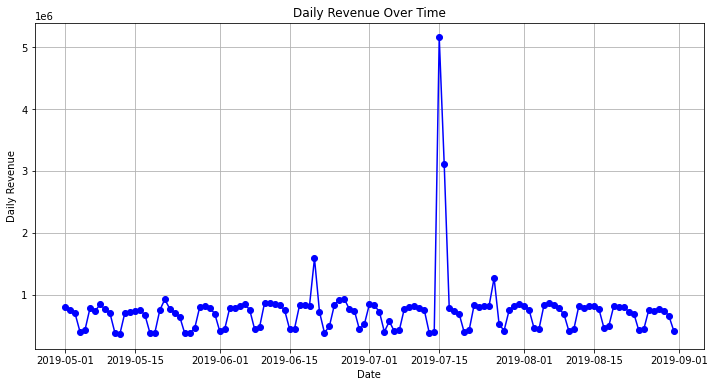

In [13]:
sales_data['FEED_DATE'] = pd.to_datetime(sales_data['FEED_DATE'])
daily_revenue = sales_data.groupby('FEED_DATE')['ORDERED_REVENUE'].sum()

plt.figure(figsize=(12, 6))
plt.plot(daily_revenue.index, daily_revenue.values, marker='o', linestyle='-', color='b')
plt.title('Daily Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Revenue')
plt.grid(True)
plt.show()


#We can clearly see that '2019-07-15' was a sale event date as the revenue shows a sudden spike. That is we can pin-point the exacvt date of the sale event. Also we can see the effectiveness of the event. 

# QUESTION 4

In [14]:
#By identifying the chart, we can state that the revenue dropped instantly after the sale.

#Here the revenue after sale event drops, which means event was a success in revenue but the impact was bad which led daily revenue to be low as compared to average revenue.

# QUESTION 5

In [15]:
subcategory_revenue = sales_data.groupby(['CATEGORY', 'SUB_CATEGORY'])['ORDERED_REVENUE'].sum().reset_index()
subcategory_revenue['Growth Rate'] = subcategory_revenue.groupby('CATEGORY')['ORDERED_REVENUE'].pct_change()
slowest_growth_subcategory_index = subcategory_revenue.groupby('CATEGORY')['Growth Rate'].idxmin()
slowest_growth_subcategory_index = slowest_growth_subcategory_index.dropna()
slowest_growth_data = subcategory_revenue.loc[slowest_growth_subcategory_index].reset_index(drop=True)
print("Subcategory with Slowest Growth Rate Relative to Its Category:")
print(slowest_growth_data)

Subcategory with Slowest Growth Rate Relative to Its Category:
                      CATEGORY                     SUB_CATEGORY  \
0    0400 Computer Peripherals              0460 Mice - DELETED   
1                  1000 Inputs  1008 Computer Peripherals Other   
2      1500 Tablet Accessories     1504 Tablet Stands and Docks   
3  5000 Portable Media Players       5045 Media Speaker Systems   

   ORDERED_REVENUE  Growth Rate  
0             0.00    -1.000000  
1             0.00    -1.000000  
2         13131.97    -0.530196  
3       5765041.39    17.359727  


In [16]:
#These following sub-category are the one to which we should be concerned about. 

# QUESTION 6

In [17]:
#We can check for any null values

In [18]:
missing_sales_values = sales_data.isnull().sum()
missing_glance_values = glance_view.isnull().sum()
print("Null values in sales data: ")
print(missing_sales_values)
print("\n Null values in glance: ")
print(missing_glance_values)

Null values in sales data: 
SKU_NAME             0
FEED_DATE            0
CATEGORY             0
SUB_CATEGORY         0
ORDERED_REVENUE      0
ORDERED_UNITS        0
REP_OOS            689
dtype: int64

 Null values in glance: 
SKU_NAME     0
FEED_DATE    0
VIEWS        0
UNITS        0
dtype: int64


In [19]:
#We can check for duplicate values

In [20]:
duplicate_sales_values = sales_data[sales_data.duplicated()]
duplicate_glance_values = glance_view[glance_view.duplicated()]
print("Duplicate Entries in Sales Data: ")
print(duplicate_sales_values)
print("\nDuplicate Entries in Glance Data: ")
print(duplicate_glance_values)

Duplicate Entries in Sales Data: 
Empty DataFrame
Columns: [SKU_NAME, FEED_DATE, CATEGORY, SUB_CATEGORY, ORDERED_REVENUE, ORDERED_UNITS, REP_OOS]
Index: []

Duplicate Entries in Glance Data: 
Empty DataFrame
Columns: [SKU_NAME, FEED_DATE, VIEWS, UNITS]
Index: []


# QUESTION 7

In [21]:
sku_sales_data = sales_data[sales_data['SKU_NAME'] == 'C120[H:8NV]']
sku_glance_view = glance_view[glance_view['SKU_NAME'] == 'C120[H:8NV]'][['FEED_DATE', 'VIEWS']]
sku_sales_data['ASP'] = sku_sales_data['ORDERED_REVENUE'] / sku_sales_data['ORDERED_UNITS']
sku_sales_data['FEED_DATE'] = pd.to_datetime(sku_sales_data['FEED_DATE'])
sku_glance_view['FEED_DATE'] = pd.to_datetime(sku_glance_view['FEED_DATE'])
merged_data = pd.merge(sku_sales_data, sku_glance_view, on='FEED_DATE', how='inner')
merged_data = merged_data.dropna()
merged_data = merged_data[(merged_data['VIEWS'] != 0) & (merged_data['ORDERED_UNITS'] != 0)]
correlation = merged_data['ASP'].corr(merged_data['ORDERED_UNITS'] / merged_data['VIEWS'])
print(f"Correlation Coefficient between Units/Views and ASP: {correlation:.2f}")

Correlation Coefficient between Units/Views and ASP: nan


In [22]:
#No, Unit conversion is not affected by Average Selling Price.